<a href="https://colab.research.google.com/github/romeshb/No-Mask-Alert-App/blob/main/CNN_Mask_NoMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
# This cell is only required on colab
!unzip -u "/content/drive/MyDrive/PGA 23/DEEP Learning/Mask_NoMask.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Mask_NoMask/Mask/with_mask_3495.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3496.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3497.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3498.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3499.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_35.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_350.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3500.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3501.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3502.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3503.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3504.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3505.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3506.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_3507.jpg  
  inflating: /content/Mask_NoMask/Mask/with_mask_350

In [ ]:
path1 = r'/content/Mask_NoMask'

In [ ]:
cate = ['No_Mask','Mask'] 

In [ ]:
for i in cate:
    folders = os.path.join(path1, i)
    print(folders)

/content/Mask_NoMask/No_Mask
/content/Mask_NoMask/Mask


In [ ]:
image_size = 200
input_image = []

for i in cate:
    folders = os.path.join(path1, i)
    label = cate.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)  # using the cv2 i am reading the image and storing in variable image_array
        image_array = cv2.resize(image_array, (200,image_size))
        #plt.imshow(image_array)
        input_image.append([image_array, label])

np.random.shuffle(input_image)

In [ ]:
len(input_image)

8838

In [ ]:
x = []
y = []
for x_values, labels in input_image[:2000]:
    x.append(x_values)
    y.append(labels)


X = np.array(x)
Y = np.array(y)

X = X/255


In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters = 16, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(2, activation = 'softmax'))
# model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu)) # 1st hidden layer
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 2nd hidden layer
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 3rd hidden layer
# model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # Output layer
# optimizer = tf.keras.optimizers.RMSprop()

In [ ]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X,Y, epochs = 20 , validation_split= 0.2, batch_size= 50)

Epoch 1/20
32/32 [==============================] - 2s 60ms/step - loss: 1.5661 - accuracy: 0.7125 - val_loss: 0.4383 - val_accuracy: 0.8500
Epoch 2/20
32/32 [==============================] - 1s 46ms/step - loss: 0.3348 - accuracy: 0.8750 - val_loss: 0.3335 - val_accuracy: 0.8575
Epoch 3/20
32/32 [==============================] - 1s 42ms/step - loss: 0.2262 - accuracy: 0.9131 - val_loss: 0.3099 - val_accuracy: 0.8825
Epoch 4/20
32/32 [==============================] - 1s 40ms/step - loss: 0.1493 - accuracy: 0.9500 - val_loss: 0.2697 - val_accuracy: 0.8725
Epoch 5/20
32/32 [==============================] - 1s 40ms/step - loss: 0.1105 - accuracy: 0.9656 - val_loss: 0.2632 - val_accuracy: 0.8825
Epoch 6/20
32/32 [==============================] - 1s 41ms/step - loss: 0.0881 - accuracy: 0.9737 - val_loss: 0.3049 - val_accuracy: 0.8875
Epoch 7/20
32/32 [==============================] - 1s 46ms/step - loss: 0.0786 - accuracy: 0.9781 - val_loss: 0.2891 - val_accuracy: 0.8725
Epoch 8/20
32

In [ ]:
pred = model.predict(X)
pred_class = np.argmax(pred,1)
pred_class

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import  confusion_matrix
tab = confusion_matrix(pred_class, Y)
tab

array([[ 933,    1],
       [   1, 1065]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_class, Y)

0.999

In [ ]:
np.random.randint(0,8838)

5033

Mask Present


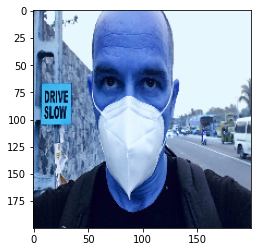

In [ ]:
# test image
test_image = input_image[np.random.randint(0,8838)][0] # selecting a random image for test
plt.imshow(test_image)
test_image = test_image/255

test_image = np.array([test_image])


pred_test_image = model.predict(test_image)
pred_test_image  = np.argmax(pred_test_image,1)

if pred_test_image  == 0: # class 0 is No Mask, class 1 is With Mask
    print("Mask Absent")
else:
    print("Mask Present")


In [ ]:
# Save the entire model to a HDF5 file at pwd.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model_CNN_Mask_NoMask_detection.h5')

In [ ]:
# # Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model_CNN_Mask_NoMask_detection.h5')

# # Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 156816)            0         
                                                                 
 dense (Dense)               (None, 2)                 313634    
                                                                 
Total params: 314,082
Trainable params: 314,082
Non-trainable params: 0
_________________________________________________________________
